#IMPORTING LIBRARIES AND LOADING DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
colors_dict = {
    "Red": "#8c0404",
    "Pink": "#f25ed0",
    "Black": "#000000",
    "Green": "#16A085",
    "Dark Blue": "#34495E",
    "Navy Blue": "#21618C",
    "Purple": "#512E5F",
    "Turquoise": "#45B39D",
    "Gray": "#AAB7B8",
    "Light Blue": "#20B2AA",
    "Hot Pink": "#FF69B4",
    "Dark Turquoise": "#00CED1",
    "Coral": "#FF7F50",
    "Lime": "#7FFF00",
    "Orchid": "#DA70D6"
}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis /Dataset/Sales.csv')

#DATA INFORMATION

In [ ]:
df.head(10)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
6,Apple,iPhone 13 Mini,Pink,6 GB,512 GB,Yes,NaN,99900,99900,Apple iPhone 13 Mini,0,0.000000
7,Apple,iPhone XR,Coral,3 GB,64 GB,Yes,4.6,42999,47900,Apple iPhone XR,4901,10.231733
8,SAMSUNG,Galaxy E5,Brown,1.5 GB,16 GB,Yes,4.2,20400,20400,SAMSUNG Galaxy E5,0,0.000000
9,Xiaomi,Redmi Note 11T 5G,Aquamarine Blue,8 GB,128 GB,Yes,4.3,21736,22999,Xiaomi Redmi Note 11T 5G,1263,5.491543


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [ ]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


how many missing values are in each column?


The following code provides a sum total of all the null values in the entire dataframe:

In [ ]:
df.isna().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

#Exploratory Data Analysis (EDA)

In [ ]:
# Determine the null values:
dfNullVals = df.isnull().sum().to_frame()
dfNullVals = dfNullVals.rename(columns = {0:'Null'})
# Determine the not null values:
dfNotNullVals = df.notna().sum().to_frame()
dfNotNullVals = dfNotNullVals.rename(columns = {0:'Not Null'})
# Combine the dataframes:
dfNullCount = pd.concat([dfNullVals, dfNotNullVals], ignore_index=False, axis=1).reset_index()
dfNullCount = dfNullCount.rename(columns = {'index':'Category'})
# Display the new dataframe:
dfNullCount

,Category,Null,Not Null
0,Brands,0,3114
1,Models,0,3114
2,Colors,0,3114
3,Memory,43,3071
4,Storage,39,3075
5,Camera,0,3114
6,Rating,144,2970
7,Selling Price,0,3114
8,Original Price,0,3114
9,Mobile,0,3114


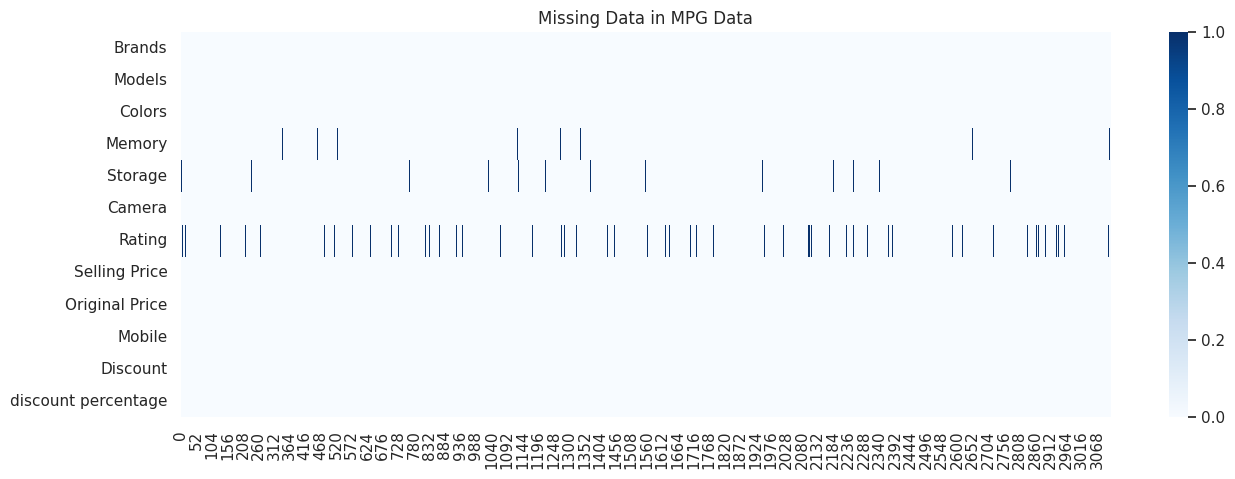

In [ ]:
plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in MPG Data")
plt.show()

What to do with Missing Data?

In [ ]:
# Calculate the mean rating
mean_rating = df['Rating'].mean()
# Impute missing values in the 'Rating' column with the mean rating
df['Rating'].fillna(mean_rating, inplace=True)

In [ ]:
print(df.isna().sum())

Brands                  0
Models                  0
Colors                  0
Memory                 43
Storage                39
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
dtype: int64


In [ ]:
df.duplicated().sum()

108

In [ ]:
df=df.drop_duplicates(keep='last')

Let's separate the continuous variables from the categorical ones and do the analysis.

In [ ]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Brands' has '17' unique values
Feature 'Models' has '914' unique values
Feature 'Colors' has '639' unique values
Feature 'Memory' has '27' unique values
Feature 'Storage' has '27' unique values
Feature 'Camera' has '1' unique values
Feature 'Rating' has '26' unique values
Feature 'Selling Price' has '844' unique values
Feature 'Original Price' has '819' unique values
Feature 'Mobile' has '928' unique values
Feature 'Discount' has '267' unique values
Feature 'discount percentage' has '539' unique values


- Continuous variables are 'Selling Price', 'Original Price', 'ratings', 'reviews'.
- Categorical all others except 'model'.
Let's analyze the 10 cheapest and 10 most expensive laptops, depending on the brand.

Text(0.5, 1.0, 'Top Expensive Models Brands')

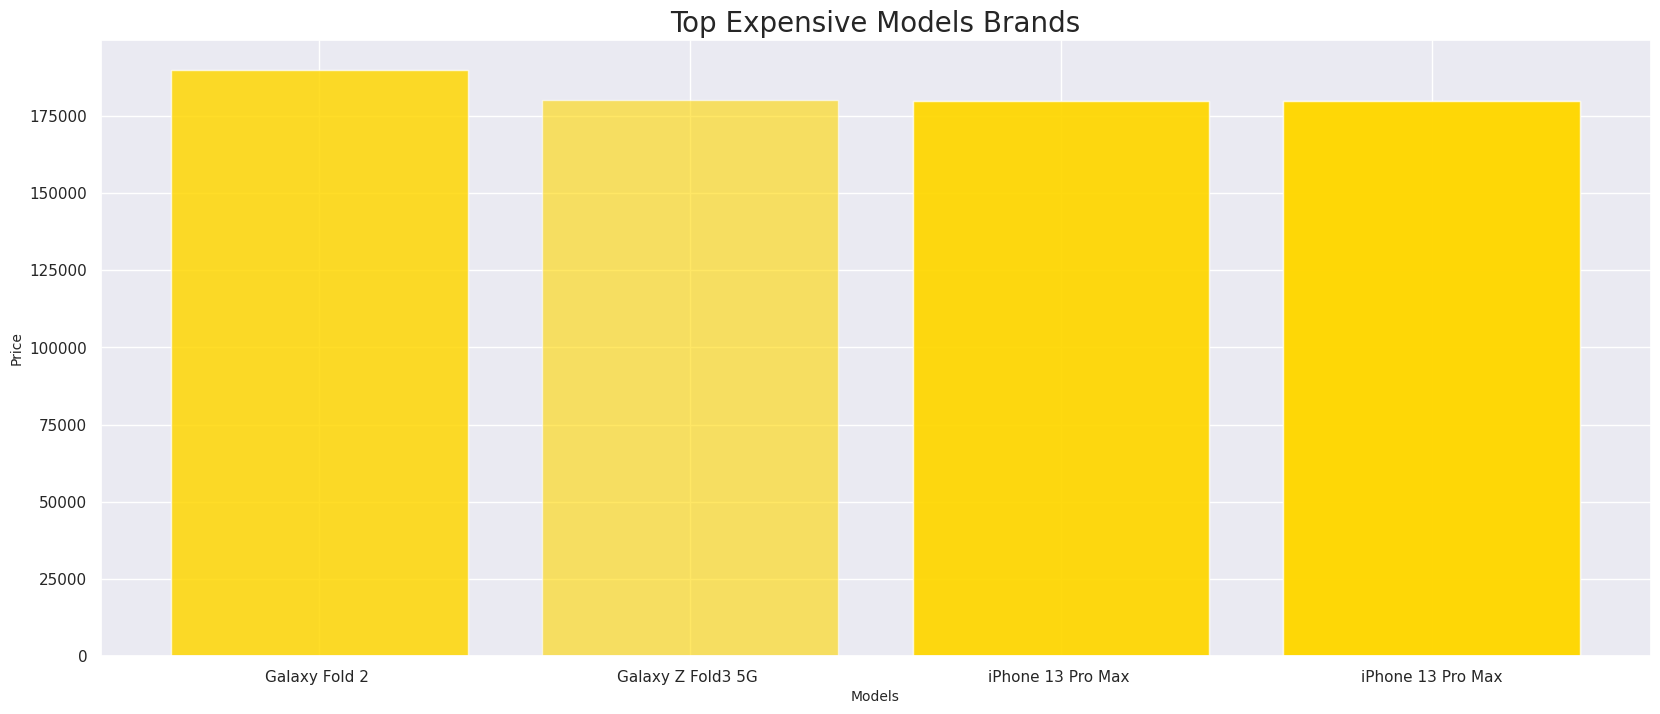

In [ ]:
top10 = df.nlargest(10,'Original Price')
plt.figure(figsize=(20,8))
plt.bar(top10['Models'], top10['Original Price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Models", fontsize = 10)
plt.title("Top Expensive Models Brands", fontsize = 20)

Let's look at the most expensive Model using a pie chart.

In [ ]:
import plotly.express as px

fig = px.sunburst(df, path=['Brands', 'Models'], values='Original Price',color='Brands')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

Let us analyze continuous variables.

In [ ]:
numeric=['Original Price', 'Discount','Rating','discount percentage']

Text(0.5, 0.98, 'Visualizing continuous columns (df dataset)')

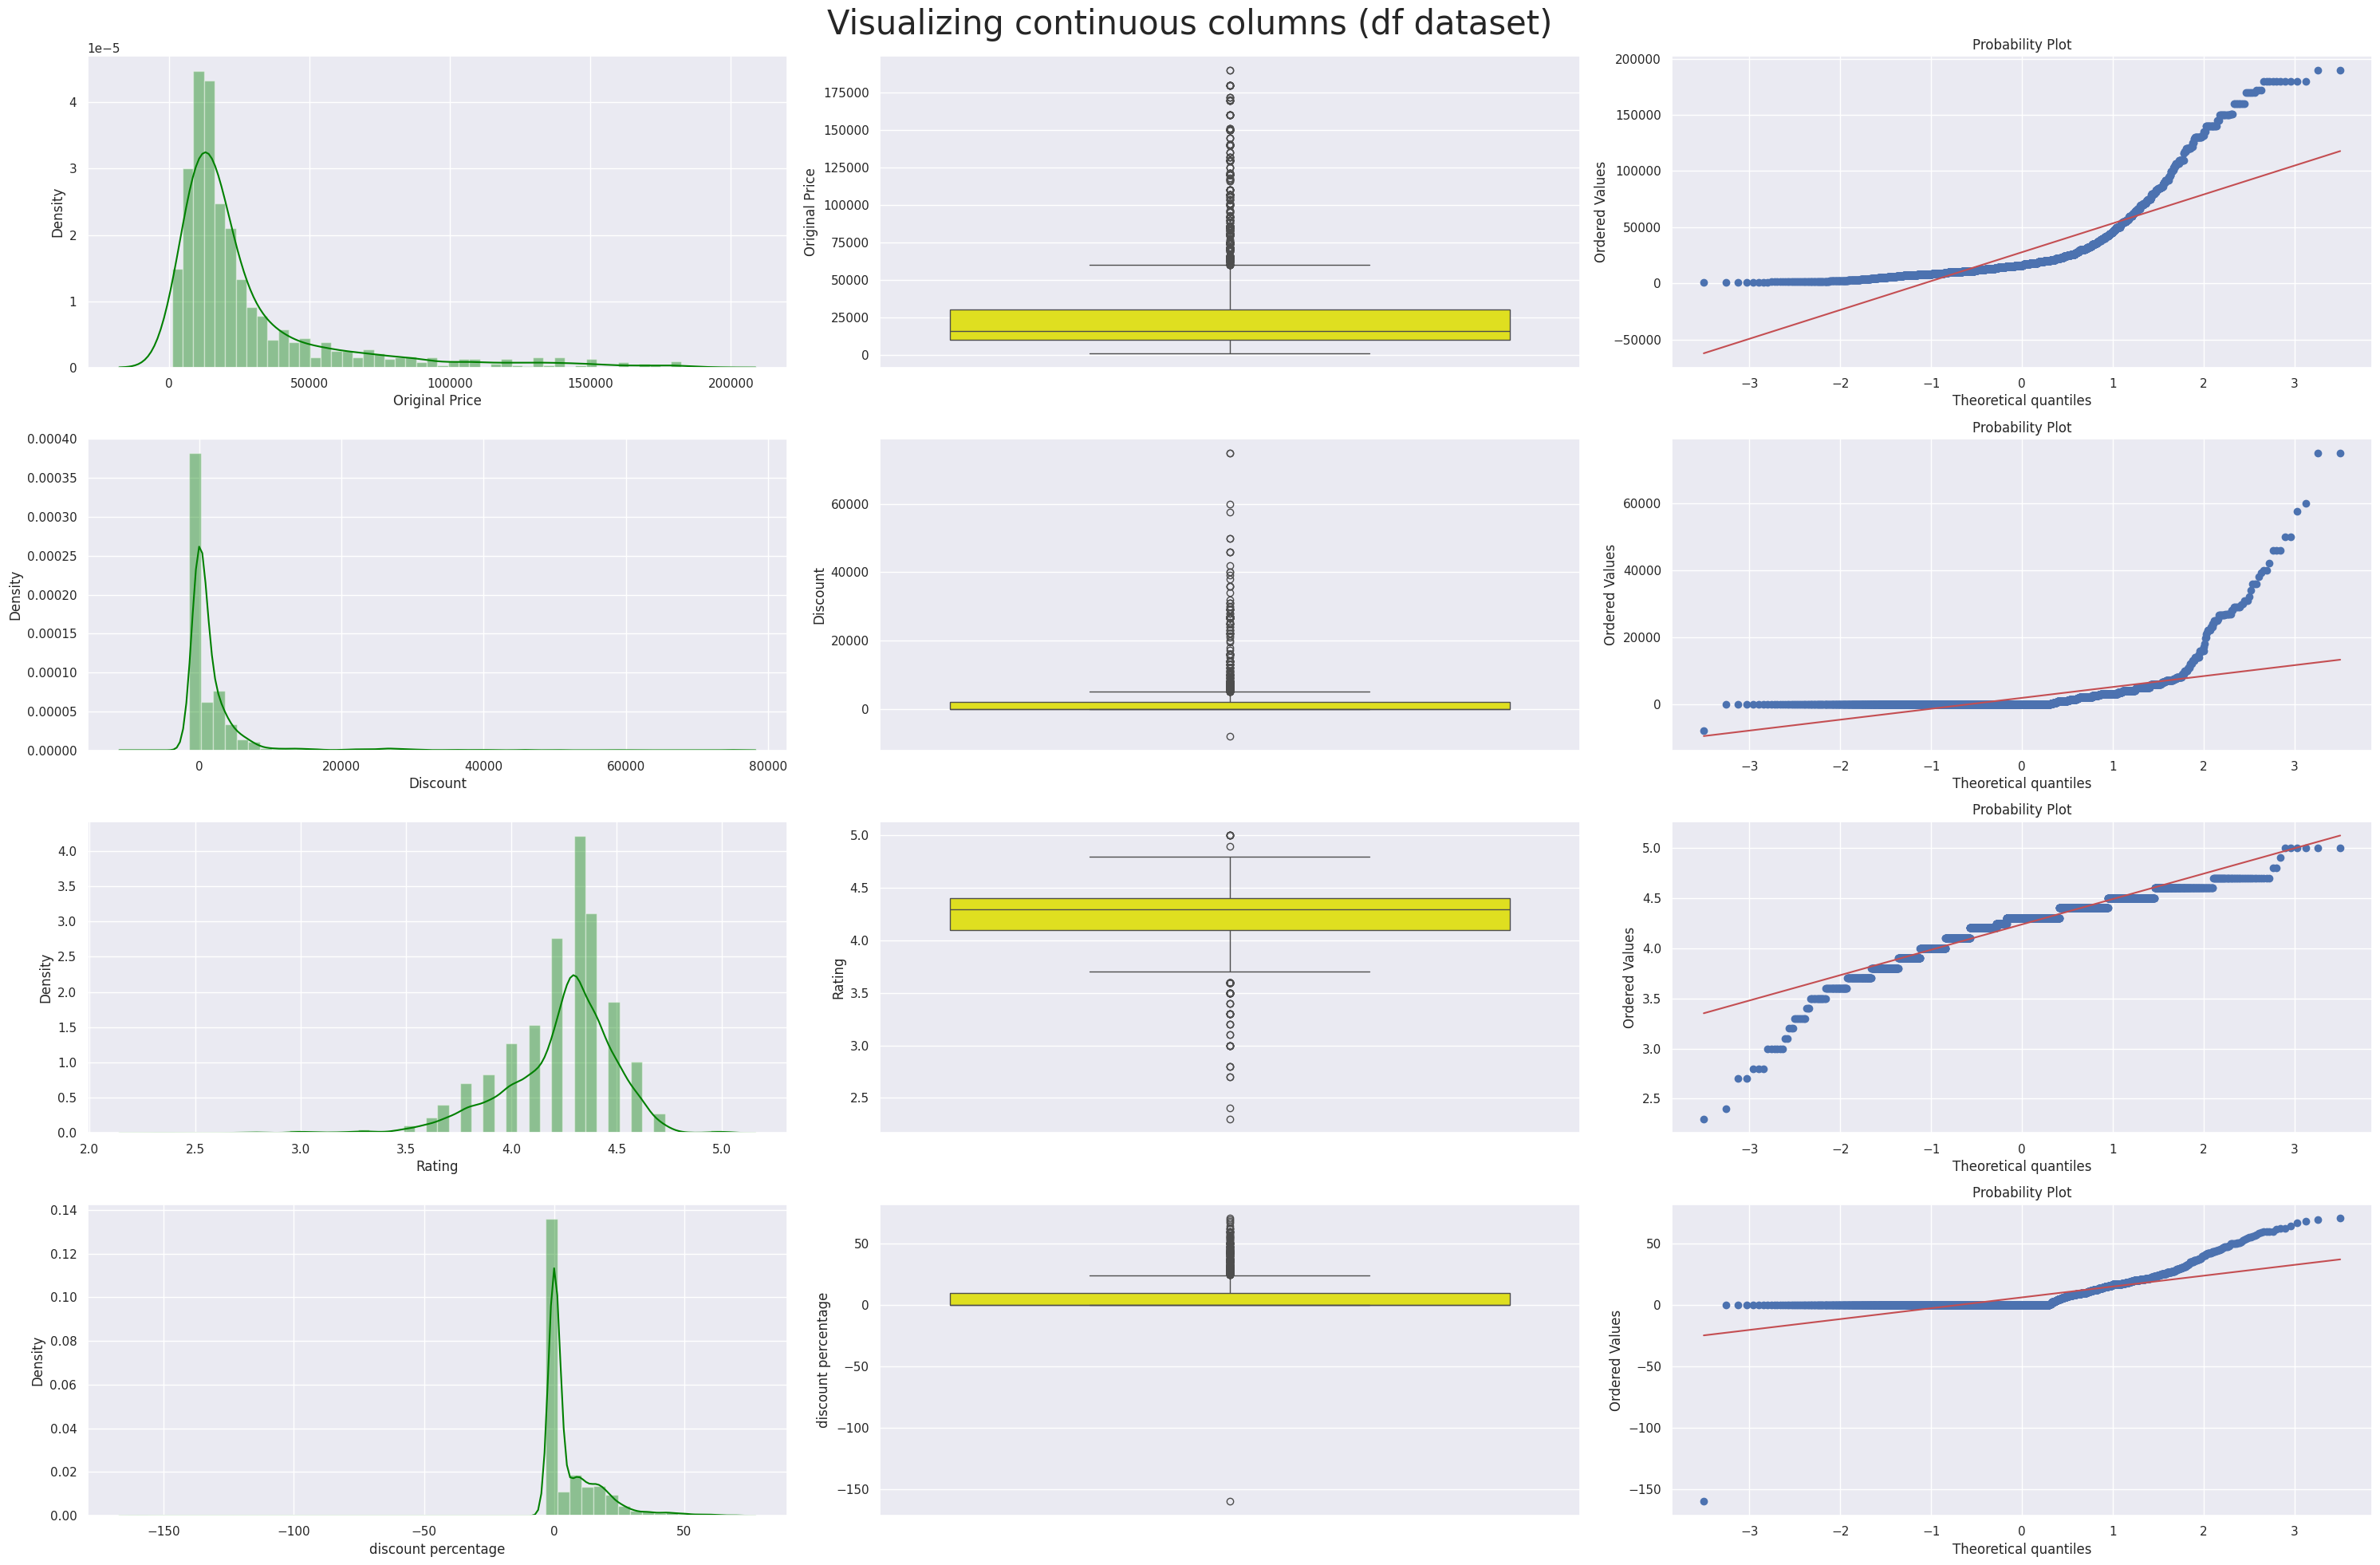

In [ ]:
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    stats.probplot(df[i],plot=ax[index,2])


fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (df dataset)",fontsize=30)

Let's carry out a mini-analysis of the presented graphs:

Original Price: This variable has a right-skewed distribution with a tail stretching towards higher values, indicating that most mobile are priced on the lower end with a few premium models.
Transforming this variable using a logarithmic scale may yield a distribution that is closer to normal, which can be beneficial for certain statistical models that assume normality.
Discount: Similar to the "Original Price," the "Discount" variable is right-skewed with extreme values on the higher end, suggesting most laptops receive a small discount with occasional large discounts. Care should be taken when considering logarithmic transformations due to the presence of values at zero, which cannot be log-transformed directly.
Rating: The distribution for the "Rating" variable is slightly left-skewed with high-density around higher values, indicating that customers generally leave positive ratings. Extreme low ratings may be considered outliers, but they seem to be few and may represent genuine customer dissatisfaction.
Discount Percentage: This variable shows a distribution centered around zero with tails on both sides, suggesting an equal distribution of positive and negative discounts when considered in percentage terms. The distribution is not perfectly normal, with slight irregularities, but there's no clear skewness.

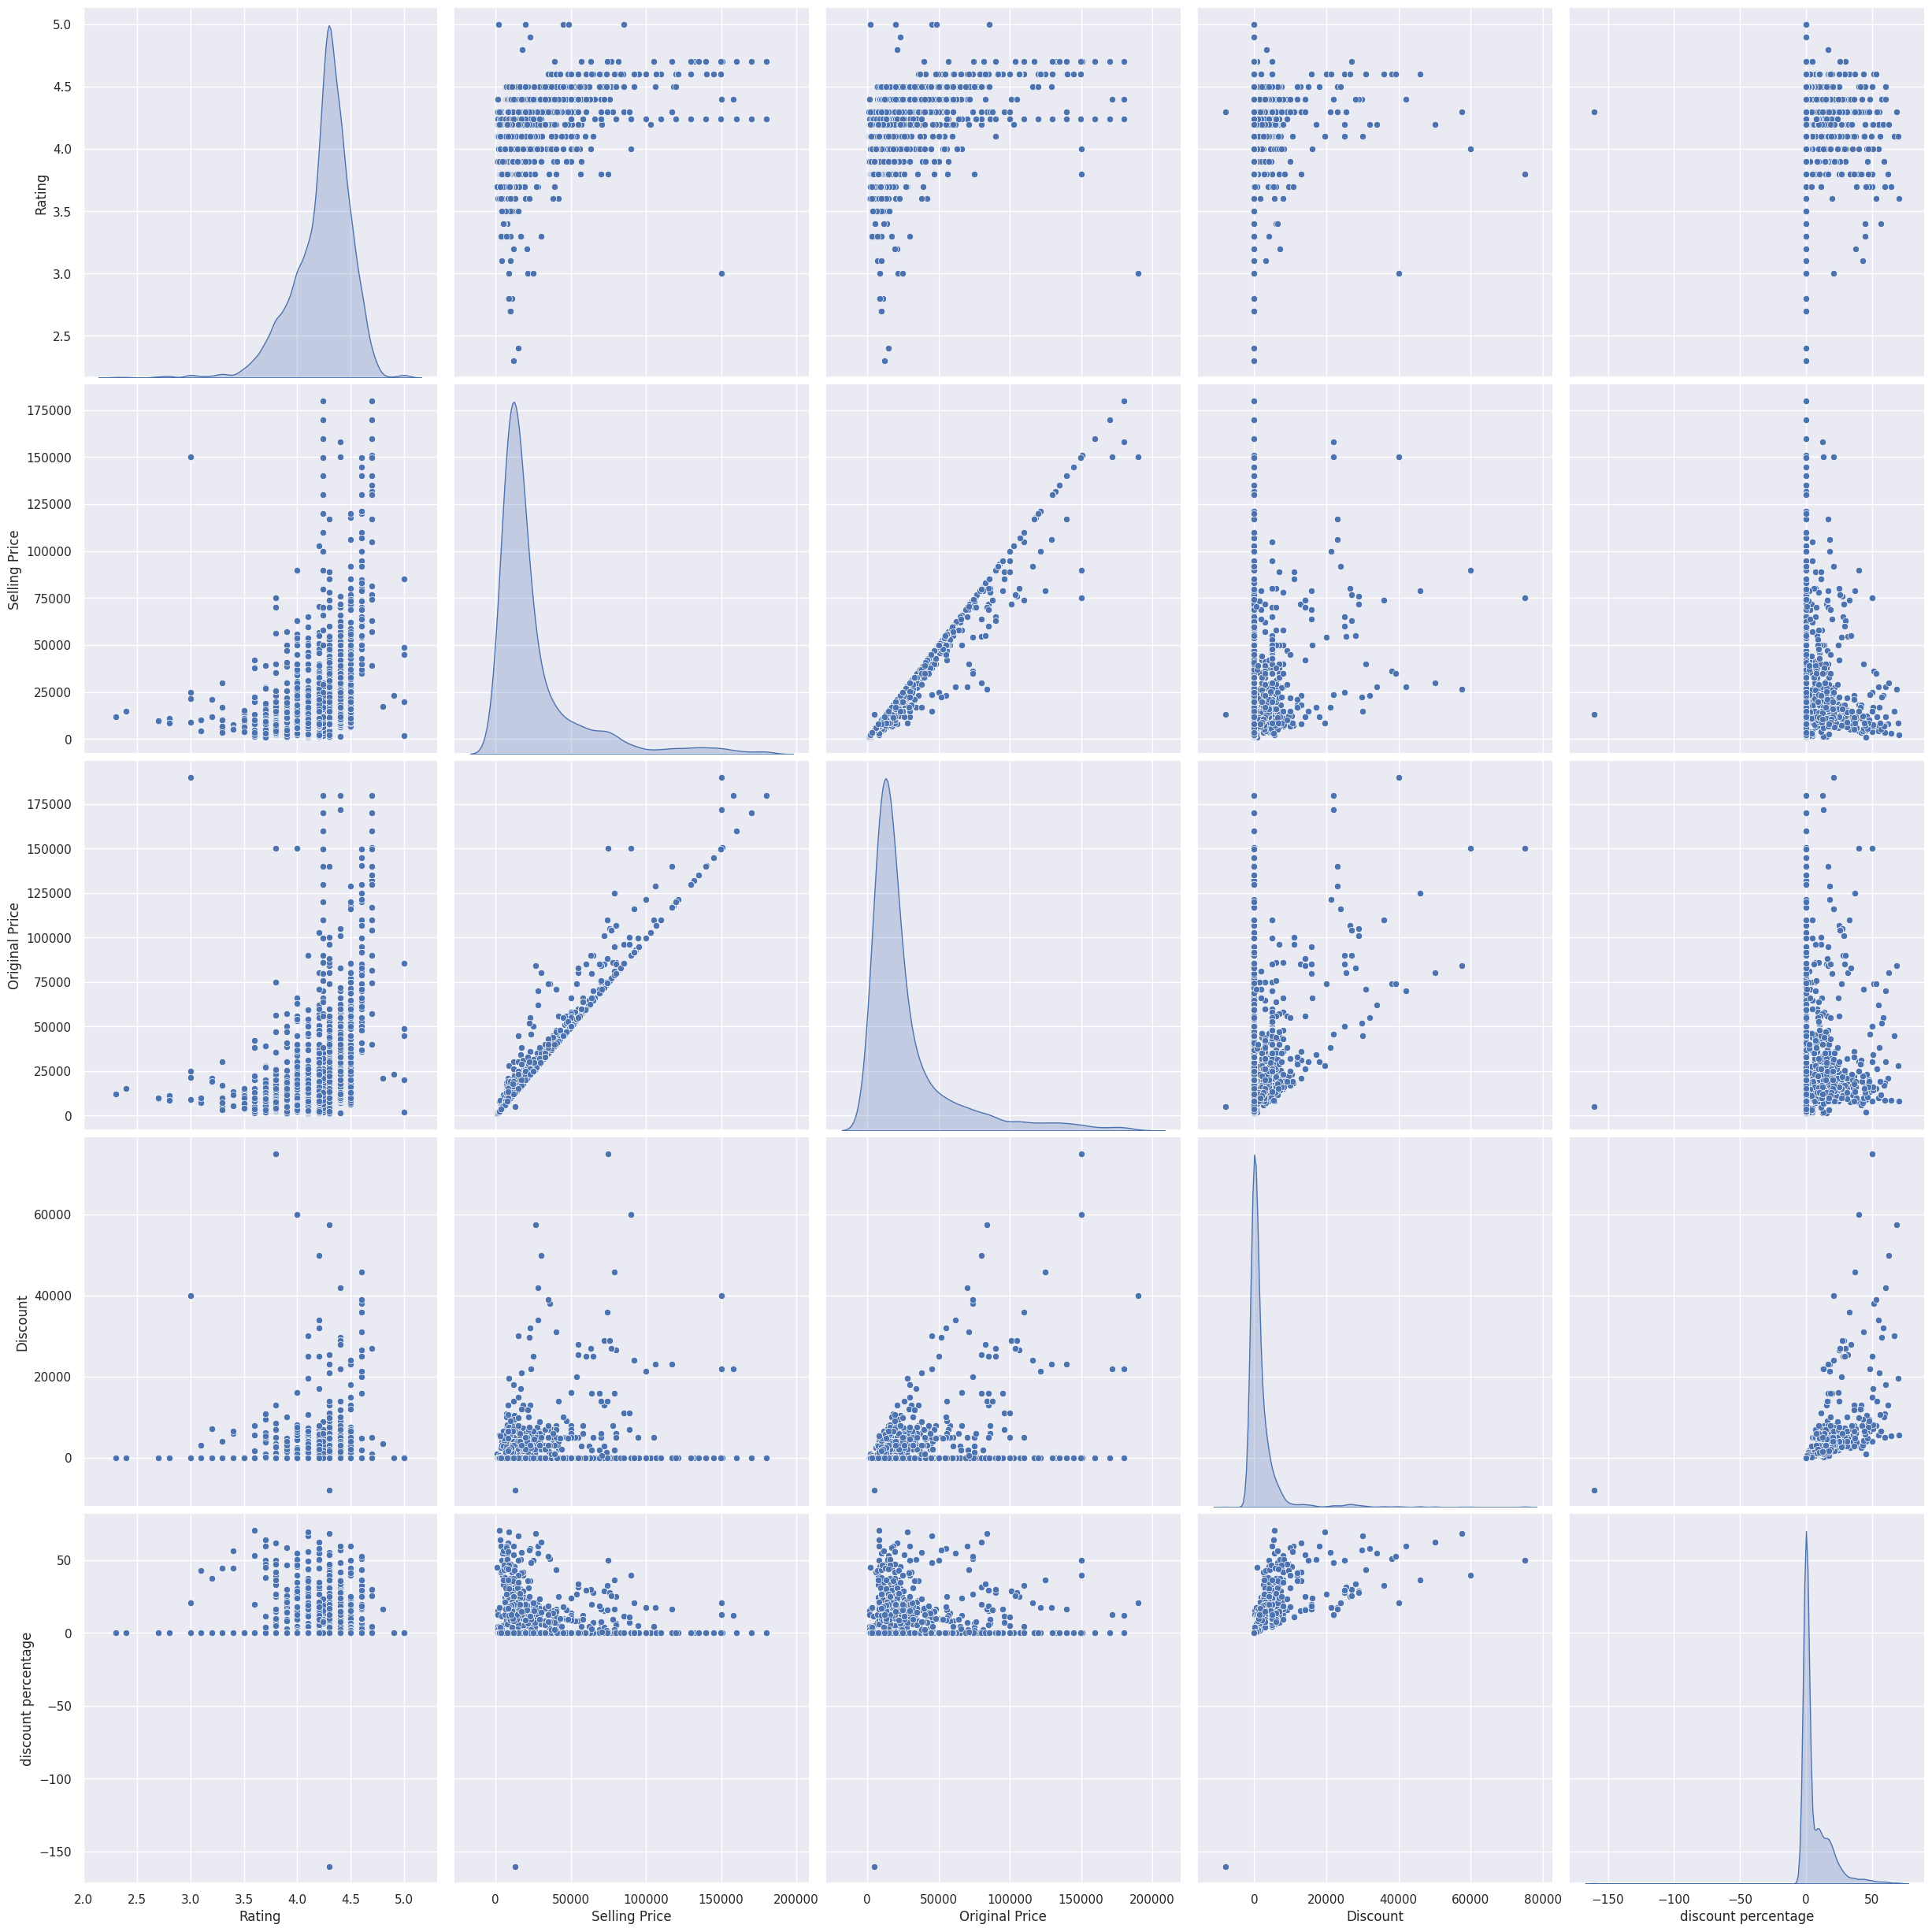

In [ ]:
sns.set()
sns.pairplot(df,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

On the graphs presented, it is easy to see the linear correlation.

Let's analyze categorical variables.

In [ ]:
df.columns

Index(['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating',
       'Selling Price', 'Original Price', 'Mobile', 'Discount',
       'discount percentage'],
      dtype='object')

In [ ]:
categorical_features=['Brands', 'Memory', 'Storage', 'Camera']

<Figure size 1500x2500 with 0 Axes>

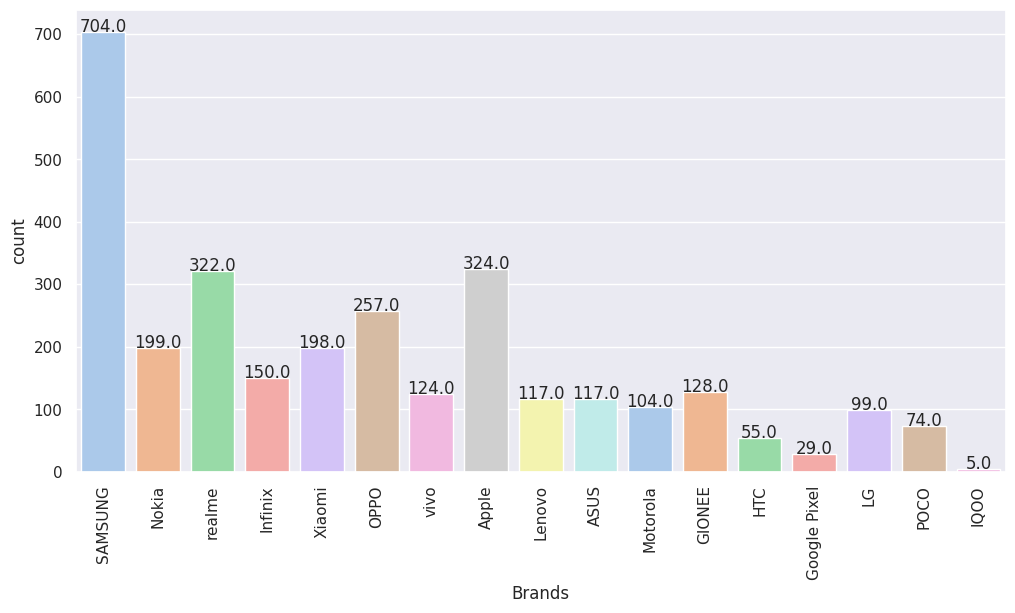

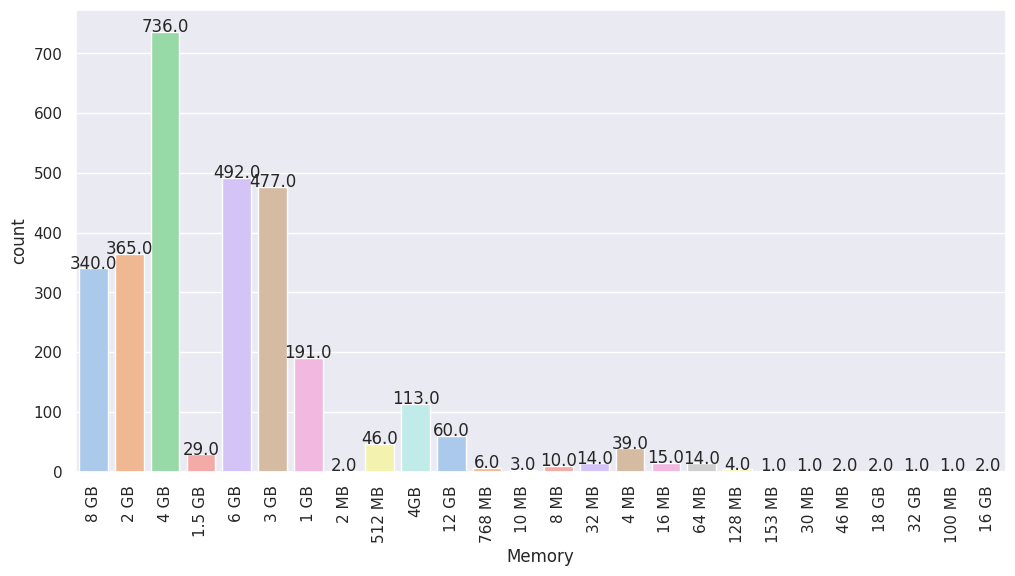

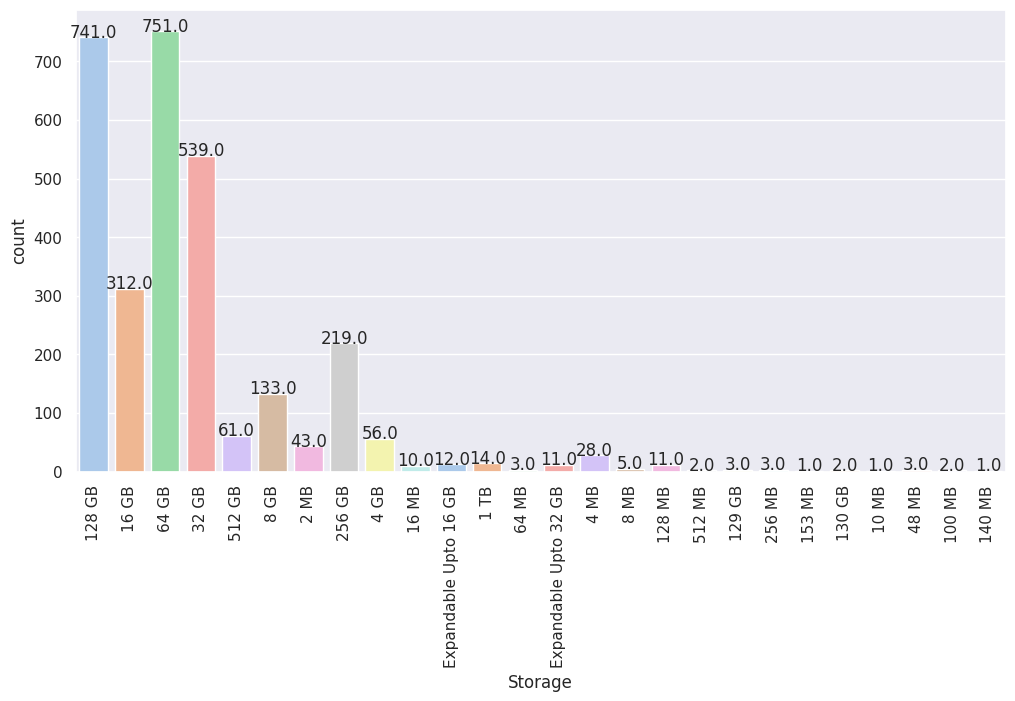

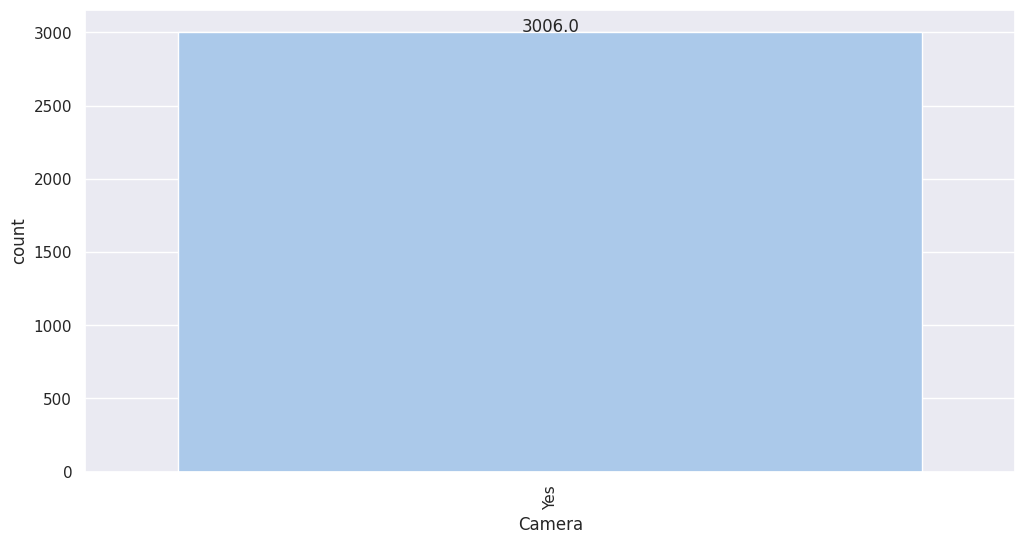

In [ ]:
i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = df,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
i+=1

To compare continuous variables, we use the correlation matrix. It will also include some categorical variables.


Brands:chart effectively illustrates the brand distribution within the dataset and indicates market diversity, with Samsung being the most prevalent brand, followed by other prominent names like Nokia and Xiaomi, and lesser counts for brands such as LG, POCO, and IQOO.

Storge : Leading Storage Capacities: The most common storage capacities are 64 GB and 128 GB, with 751 and 741 units respectively, indicating these are likely the standard offerings in the market represented by the dataset.

Memory: The 8 GB category has the highest count, with 736 units. This suggests that in the dataset, the most commonly available memory size for the devices (presumably computers or similar electronic devices) is 8 GB.


To compare continuous variables, we use the correlation matrix. It will also include some categorical variables.

In [ ]:
correlation = df.corr()
print(correlation['Original Price'].sort_values(ascending = False),'\n')

Original Price         1.000000
Selling Price          0.985786
Rating                 0.388682
Discount               0.353045
discount percentage    0.051617
Name: Original Price, dtype: float64 



Index(['Original Price', 'Selling Price', 'Rating', 'Discount',
       'discount percentage'],
      dtype='object')


<Axes: >

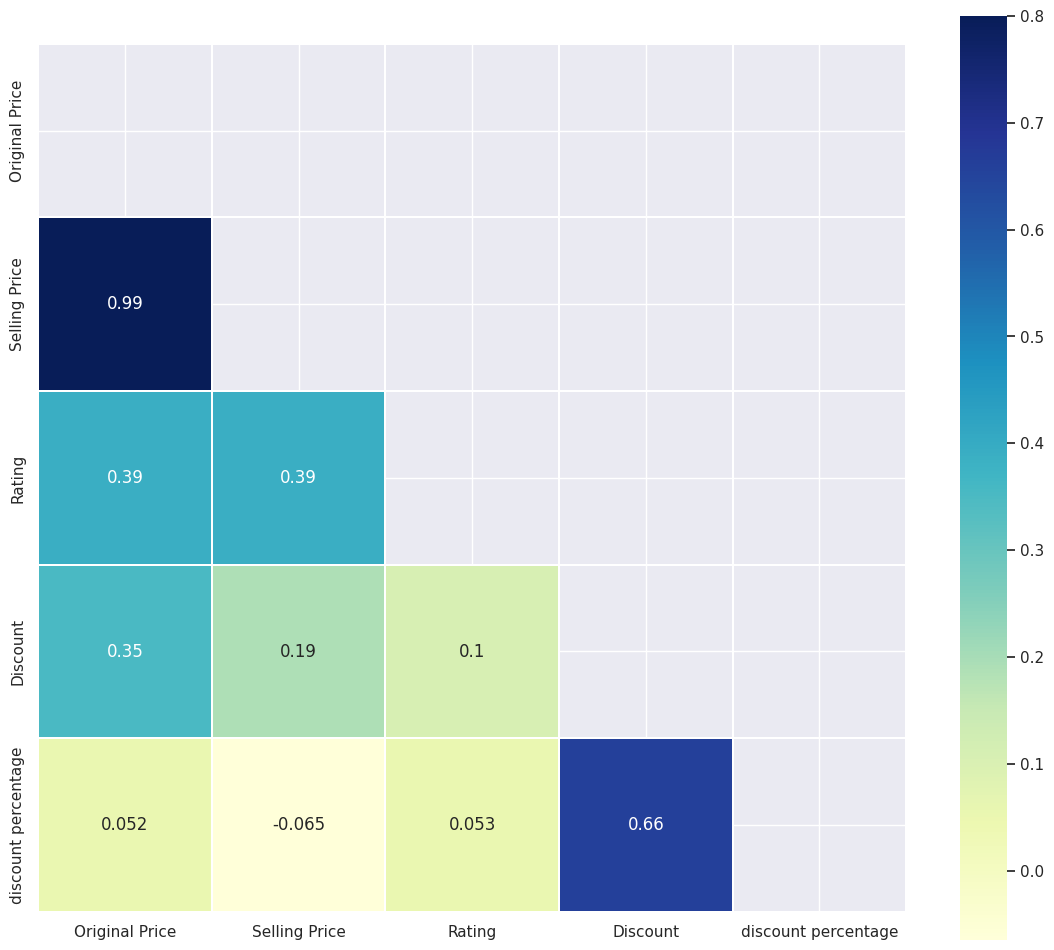

In [ ]:
k= 10
cols = correlation.nlargest(k,'Original Price')['Original Price'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
mask = np.triu(np.ones_like(df.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Conclusions from the construction of the correlation matrix:

High Correlation Between Prices: There is a very high correlation (0.99) between the Original Price and Selling Price, which indicates that the selling price of products is heavily influenced by the original price. The slight difference between them could be due to consistent discounting or markup strategies.


Moderate Correlation Between Discounts and Ratings: The Discount amount has a moderate correlation with the Rating (0.66), suggesting that the discount offered on a product could influence its rating to some extent. However, the Discount Percentage does not show a significant correlation with Rating, indicating that the percentage of the discount is not as strongly connected to how the product is rated by consumers.

#FEATURE ENGENEERING

In [ ]:
# @title
for feature in categorical_features:
  k=df[feature]
  print(f'Feature {feature} has unique values:',df[feature].unique())
  print(30*'---')

Feature Brands has unique values: ['SAMSUNG' 'Nokia' 'realme' 'Infinix' 'Xiaomi' 'OPPO' 'vivo' 'Apple'
 'Lenovo' 'ASUS' 'Motorola' 'GIONEE' 'HTC' 'Google Pixel' 'LG' 'POCO'
 'IQOO']
------------------------------------------------------------------------------------------
Feature Memory has unique values: ['8 GB' '2 GB' '4 GB' '1.5 GB' '6 GB' '3 GB' nan '1 GB' '2 MB' '512 MB'
 '4GB' '12 GB' '768 MB' '10 MB' '8 MB' '32 MB' '4 MB' '16 MB' '64 MB'
 '128 MB' '153 MB' '30 MB' '46 MB' '18 GB' '32 GB' '100 MB' '16 GB']
------------------------------------------------------------------------------------------
Feature Storage has unique values: ['128 GB' '16 GB' nan '64 GB' '32 GB' '512 GB' '8 GB' '2 MB' '256 GB'
 '4 GB' '16 MB' 'Expandable Upto 16 GB' '1 TB' '64 MB'
 'Expandable Upto 32 GB' '4 MB' '8 MB' '128 MB' '512 MB' '129 GB' '256 MB'
 '153 MB' '130 GB' '10 MB' '48 MB' '100 MB' '140 MB']
------------------------------------------------------------------------------------------
Feature Cam

In [ ]:
# @title
df['Storage'].value_counts().to_frame()

,Storage
64 GB,751
128 GB,741
32 GB,539
16 GB,312
256 GB,219
8 GB,133
512 GB,61
4 GB,56
2 MB,43
4 MB,28


In [ ]:
# @title
df['Models'].value_counts().to_frame()

,Models
3,26
iPhone 13 Pro Max,19
iPhone 11,19
iPhone 12,18
iPhone 12 Mini,18
...,...
V40 ThinQ,1
Nexus4 E960,1
150,1
GT 1200 R/I/M,1


In [ ]:
# @title
df.columns

Index(['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating',
       'Selling Price', 'Original Price', 'Mobile', 'Discount',
       'discount percentage'],
      dtype='object')

In [ ]:
# @title
OH=['Brands', 'Models', 'Colors', ]

In [ ]:
# @title
df.shape

(3006, 12)

In [ ]:
# @title
ind=range(3006)
df['Index']=ind
df=df.set_index('Index')

In [ ]:
# @title
for feature in OH:
  TBL=pd.get_dummies(df[feature]).add_prefix(feature)
  df=df.merge(TBL,on='Index')
  df.drop([feature],axis=1,inplace=True)

In [ ]:
# @title
TX=['Memory', 'Storage']

Let's remove the letters from the signs, leaving only the numbers.

In [ ]:
# @title
df.fillna('9999TH',inplace=True)

In [ ]:
# @title
import re

In [ ]:
# @title
for feature in TX:
  K=list(df[feature])
  K1=[float(re.sub("\D","",i)) for i in K]
  df[feature]=K1

In [ ]:
# @title
df.replace(9999, np.NaN,inplace=True)

Excellent! Let's clean up our dataset from outliers using the LOF method. We delete no more than 10% of the dataset.

In [ ]:
# @title
df.drop('model',axis=1,inplace=True)

In [ ]:
# @title
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# @title
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict(train1)

NameError: name 'train1' is not defined